# Section 0 - Intro

In [16]:
# example cell
a = 5
print (a)

5


[example solution](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/08f7239802b77de40d378b58fb9dbbfa.txt)

# Section 1 - The leaky-integrate and fire (LIF) model and python basics

## Section 1.1. 

In order to write programming scripts, we need a few basics: 

We will program our scripts in python, a very versatile and widely used programming language. 
To execute the written programs we need a <i>python interpreter</i>. Google colab allows us to run an instance in the browser, without the need to install anything locally on the computer. 




While learning the basics of python, we want to look at an example model taught in the lecture. The leaky integrate and fire (LIF) model. 
<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/neuron_to_circuit.png" width="750"/>
</div>

From the lecture we know that we can describe the change of the membrane potential with the following equation:

\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} + R_m\,I_e \qquad (1)
\end{equation}

where $V$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $R_m$ is the membrane resistance, $I_e$ is the external current.

We ignore the injected external current for now ($I_e = 0$) which means the equation simplifies to 
\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} \qquad (2)
\end{equation}



in this equation we have three parameters that we need to define, let's do this: 

#### Task 1 - Execute the cell below
When executing a cell, the python interpreter will run the code we provide.

When you select the cell and either press 'Run' at the top of the page or press 'shift+Enter' on the keyboard. 

try it out:

In [1]:
tau_m = 10 # in ms
v = -50 # in mV
el = -60 # in mV
print (tau_m, v, el)

10 -50 -60


[Solution 1 -  What happend](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/b9dafbadeda6b0afaf4eb56a6e030b88.txt)

#### Task 2 - Exectue the cell below

Following equation (2), we can now calculate the change in the membrane that occurs for our defined voltage value. 

In [12]:
tau_m = 10 # in ms
v = -50 # in mV
el = -60 # in mV
dv_dt = (-v + el)/tau_m
print (dv_dt)

-1.0


[Solution 2 - What happend](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/0b6d6a1ac53626e007cfe2ae7ca52865.txt)

#### Task 3 - Calculate the voltage change for multiple time steps

After applying the change in voltage as we did above for one time step (adding -0.5mV/ms * 1ms to -50mV), we can ask again what the change is - given the new voltage value, then apply this again and so on

In [3]:
tau_m = 10 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)

dv/dt -1.0
v -50.1
dv/dt -0.9899999999999999
v -50.199


[Solution 3 - What happend](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/c9bbcb4f8f0d6e08edf5282d0deea52d.txt)

## Loops
More specifically, the for-loop.
Loops allow us to execute the same code multiple times, or even to let programs run indefinetly. We can re-write the above code with a for-loop.

#### Task 4 - Change the number of repetitions

Initially we execute the code block from above (2 times). You can change how often it will be repeated by changing the number in the 'range' function. Try it out.

In [4]:
tau_m = 10 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms

for ii in range(2):
    dv_dt = (-v + el)/tau_m
    print ('dv/dt', dv_dt)
    v = v + dv_dt * dt
    print ('v', v)

dv/dt -1.0
v -50.1
dv/dt -0.9899999999999999
v -50.199


[Solution 4 - What happend](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/dc08a6dbb265e55110b411909991e3ab.txt)

#### More information on the for-loop

You just executed a for-loop. The syntax of a for-loop is the following:
```python
    for iteration_variable in values_to_iterate_through:
        # do something
```

In our case the iteration variable is ii and the values_to_iterate_through are provided by the function range() where we can provide an input paramter.

It is important to note that we see an indentation after we defined our for-loop (and ended the line with a colon)

Everything that is indented will be executed within the loop. 
You can try it out with the example above by removing the indent for the last line. v will then be printed only when the loop is done.

Ususally, people use four or two spaces as the indentation level (or pressing TAB).

You can also access the iteration variable in the for-loop. you can try out the example below.   

#### Task 5 - Answer the following questions

0) execute the cell

1) what is the starting/ending value for the iteration variabel ii, does it make sense to you?

2) you will see that the iteration variable takes on integer values, how can you get floating point steps instead? - try it out

In [4]:
for ii in range(4):
    print (ii)

0
1
2
3


[solution 5](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/d9983871b5db5f9605dc1191890502b8.txt)

#### We now use the for loop to run our code from above many times and look at the final value of v

#### Task  6 - Change the starting value of v

When executing the cell below, you can now change the starting value of v. 

However, you should see that (given we have enough repetitions), your final v should always be very close to the same value. Can you explain why this is correct?

In [11]:
tau_m = 10 # in ms
el = -60 # in mV
dt = 0.1 # in ms

v = -50 # in mV

for ii in range(500):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt

print ('final v', v)

final v -59.934295169575854


[Solution 6](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/e9301038094966b69fb0b4d6c8c80217.txt)

## Lists

Until now we defined how v should evolve over time and we can see what the final value of v is, or print intermediate values of v. Ultimately, we want to save the values of v between the beginning and the end, in order to access them later on. This leads us to another variable type.

Lists can store multiple varibales of the same, or even of different types. A list is defined like this
```python
    example_list = [1,2,3]
    empty_list = []
```
We can append elements to this list with 
```python
    empty_list.append(1)
```

#### Task 7 - save all intermediate values of v

can you re-write the code from above, so that we do not only print the final v but a list of all v's after the loop has finsihed?

In [6]:
tau_m = 10 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms
v_list = []

# continue here with your code

[Solution 7](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/f83a04de6a1c5742e9f506b41c43f321.txt)

#### Great ! 
We now have run a simulation of the time evolution of the membrane voltage and saved the values of v. However, we would also like to have the corresponding values of the time that passed for every voltage value. 

#### Task 8 - save the time values as well

Can you re-write the code above, to not only save and print the voltage values, but also do the same for the time steps? 

In [9]:
''' 
    Put your code here
'''

' \n    Put your code here\n'

[Solution 8](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/55fb97641ed9a75a13eed8e5a19f663a.txt)

## Plots

To get a better understanding of how the voltage evolves, we want to visualize the data.

To visualize with python, we make use of a library. Libraries provide pre-written functions, so we don't have to write them from scratch. To import a library we have to add the following line (usually always at the beginning of the code)
```python
    import matplotlib.pyplot as plt
```
with this line we can import the library matplotlib.pyplot and we can call it from then on with the the name plt 
Once imported, we can use this command in each cell of the notebook.

#### Task 9 - Play around

In the cell below you can play around with plotting. 
here is the original code of the cell in case you want to reset:
```python
import matplotlib.pyplot as plt

plt.figure()
plt.title('Example Plot')
x = [0,1]
y = [1,2]
plt.plot(x,y,color='red', linewidth=2.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
```
<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/simple_line_plot.png" width="350"/>
</div>


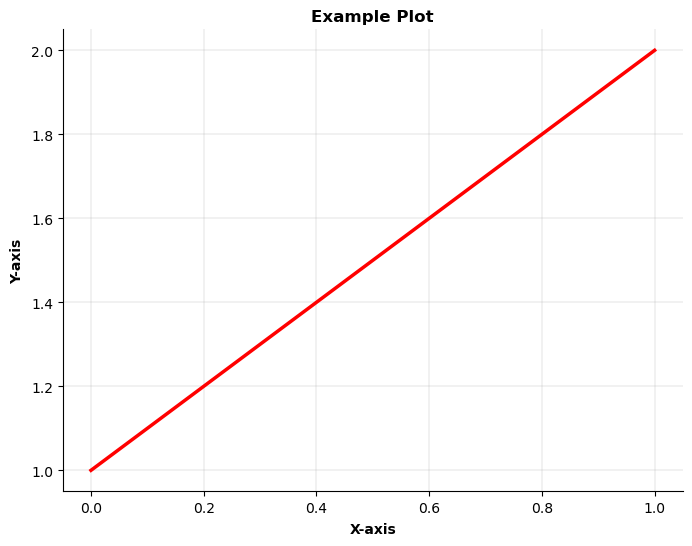

In [4]:
import matplotlib.pyplot as plt
plt.style.use("https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/plots_style.txt")

plt.figure()
plt.title('Example Plot')
x = [0,1]
y = [1,2]
plt.plot(x,y,color='red', linewidth=2.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

[Solution 9 - What happend](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/482fdd347c57468ece99c67755a3fcd8.txt)

#### Task 10 - Plot the time evolution of the membrane voltage

Try to combine the code where we calculate and save the v and t values and the plotting code to create a figure that should look roughly like this:

(with a starting value of v = -55, a timestep dt=0.1 and iterating over range(500) )

<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/membrane_voltage_decay.png" width="350"/>
</div>


In [8]:
''' 
    Put your code here
'''

' \n    Put your code here\n'

[Solution 10](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/c8b80ebd8d5a135736ec6c44669639a8.txt)

#### In context

Make sure that you understand what the plot shows us.

We can see the development of the membrane potential over time for our neuron model. When we set it to a certain value (for example -55 mV) it will constantly change until it reaches the resting potential 'el'.

We now want to further explore the behavior with interactive tools, but for that we first need to introduce another programming concept: **Functions**


## Functions

A function allows us to structure our code more efficiently. A function can take arguments, execute code when it's called and return values once its finished. The general structure looks like this

```python
def function_name (parameter):
    
    # execute code (we can use the variable 'parameter' here)
    
    return values
```

There are many important apsects about functions behind this simple introduction, but we will cover these when they become relevant. Note, however, that we again have the indent behind our first line (that closes with a colon) to indicate which lines belong to the function. For now, we will start by re-writing the code we already have for the time evolution of the membrane potential into a function

```python
def voltage_evolution(v_start):
    tau_m = 10 # in ms
    el = -60 # in mV
    dt = 0.1 # in ms
    v = v_start
    
    v_list = []
    t_list = []    

    for ii in range(500):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list
```

All we did now is taking the code from above and putting it into the structure of a function. 
We name the fucntion 'voltage_evolution' and we define an argument 'v_start'. This argument is used within the function to set our parameter of v. 
In the end, we then pass v_list and t_list.

Now we will use this function, to see how different starting conditions of the membrane potential lead to different voltage traces.

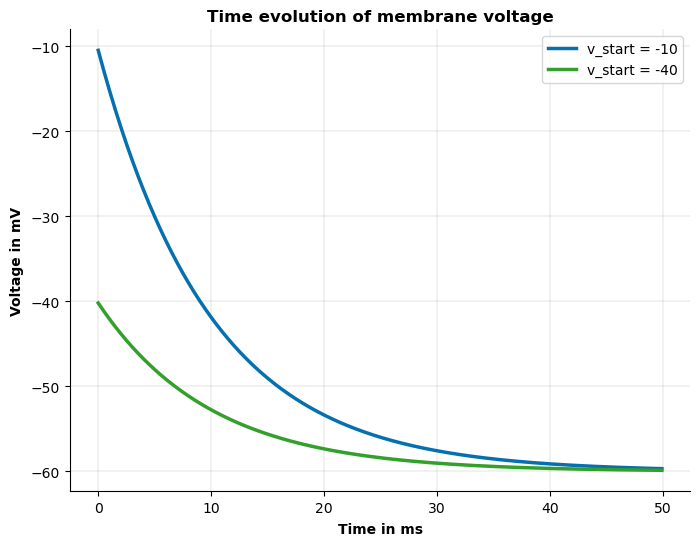

In [15]:
def voltage_evolution(v_start):
    tau_m = 10 # in ms
    el = -60 # in mV
    dt = 0.1 # in ms
    v = v_start
    
    v_list = []
    t_list = []    

    for ii in range(500):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list



plt.figure()
plt.title('Time evolution of membrane voltage')

v_list_1, t_list_1 = voltage_evolution(v_start=-10)
plt.plot(t_list_1,v_list_1,linewidth=2.5, label='v_start = -10')

v_list_2, t_list_2 = voltage_evolution(v_start=-40)
plt.plot(t_list_2,v_list_2,linewidth=2.5, label='v_start = -40')

plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.legend()
plt.show()

####  What happend

We now took the code we already wrote earlier and changed it slightly. First we defined the function "voltage_evolution" 
It is important to note that when executing a cell where we define a function, this function is not executed but only defined. To execute it we have to call it first. 

This is what we do just before we plot t_list_1 & v_list_1 and again before we plot t_list_2 & v_list_2
Our function is then executed with the value for v_start that we specify and once it finishes it returns the created lists. We can then use these lists to plot the results.


#### Task 11 - change the code so that you can vary other parameters

change the function (and the parts where the function is called), so that you can change other parameters of the function (for exmaple el) to see how they effect the changes of the membrane voltage. 

(when looking at other parameters, you should also make sure to adjust the labels of the plot)


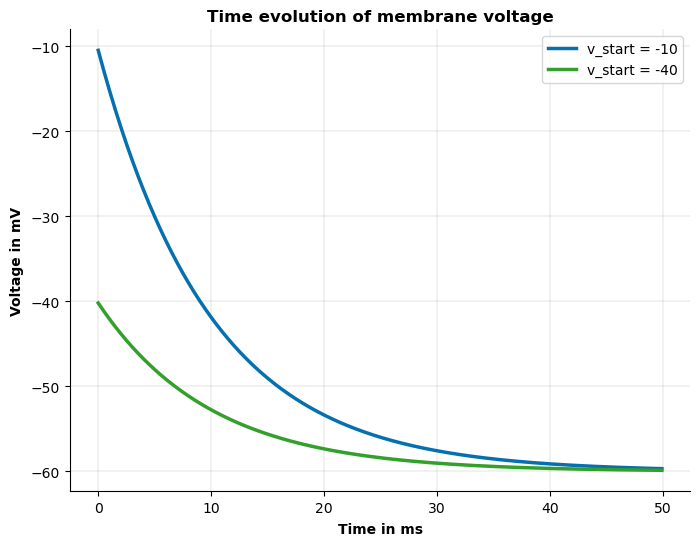

In [16]:
#Change the code in this cell. You can always copy the code from above in case something breaks that you cannot recover

def voltage_evolution(v_start):
    tau_m = 10 # in ms
    el = -60 # in mV
    dt = 0.1 # in ms
    v = v_start
    
    v_list = []
    t_list = []    

    for ii in range(500):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list



plt.figure()
plt.title('Time evolution of membrane voltage')

v_list_1, t_list_1 = voltage_evolution(v_start=-10)
plt.plot(t_list_1,v_list_1,linewidth=2.5, label='v_start = -10')

v_list_2, t_list_2 = voltage_evolution(v_start=-40)
plt.plot(t_list_2,v_list_2,linewidth=2.5, label='v_start = -40')

plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.legend()
plt.show()

[Solution 11 - What happend](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/9682fd56e1dcf3f493091bee5e6503e8.txt)

#### Task 12 - Explore paramters

We now use another library called ipywidgets that allows us to build interactive plots. We have to import the interactive function and can then call our defined function and define the paramters we want to vary, we do so by specifying the range for each parameter in the following fashion:

```python
chosen_parameter = (start_value, end_value, step_size)
````

To make it more convenient, we now combine the simulation and the plotting part into one function.

You can try it out by executing the cell below and explore how the different parameters influence how the membrane voltage evolves.

In [25]:
from ipywidgets import interact

def voltage_evolution(el, tau_m, v):
    dt = 1 # in ms

    v_list = []
    t_list = []    

    for ii in range(100):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time

    
    return v_list, t_list


def run_simulation_and_show_plot(el=-60, tau_m=10, v=-50):
        
    v_list, t_list = voltage_evolution(el, tau_m, v)

    plt.figure()
    plt.title('Time evolution of membrane voltage')

    plt.plot(t_list,v_list,linewidth=2.5)

    plt.xlabel('Time in ms')
    plt.ylabel('Voltage in mV')
    
    plt.ylim([-185,65])
    plt.show()
    
interact(run_simulation_and_show_plot, el=(-180,60,2), tau_m=(1,30,1), v=(-180,60,2))


interactive(children=(IntSlider(value=-60, description='el', max=60, min=-180, step=2), IntSlider(value=10, de…

<function __main__.run_simulation_and_show_plot(el=-60, tau_m=10, v=-50)>

### Input currents

Now we have seen how the membrane voltage evolves over time when we initialize it at a certain value and do not interfere with it otherwise. Now we want to come back to equation (1)

\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} + R_m\,I_e \qquad (1)
\end{equation}

Therefore we now want to add the possibility to inject a current into the cell, to see how this influences the dynamics. 

We have to modify how the voltage changes in each time step
```python
dv_dt = (-v + el + r_m * I_e)/tau_m
```

and we need to define the new varibles as well. 
A rough estimate for a cell resistance is 
```python
r_m = 100e6 # Ohm
```
If we then apply currents they should be on the magnitude of

```python
I_e = 10e-8 # milli ampere
```


### Task 13 - rewrite the function to allow an external input current

Take the function from above (you can use the interactive version if you like) and modify it so that you can change the input current I_e.
You can set the other parameters to fixed values again (either as defaults in the argument of the function or define them in the function)

In [13]:
''' 
    Put your code here
'''

' \n    Put your code here\n'

[Solution  13](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/93653f83ea6ec8362d601a619efa56b3.txt)

# Spikes 

So far, we modeled the membrane voltage of a cell and we are able to provide some input in form of a current. However, our cell cannot spike yet. Now we want to add a spiking condition. 

Neurons spike when they reach a certain threshold (how the spiking happens exactly is what we will look at later in the semester, it does not matter for our simple neuron model)

Now we add a condition to our equation (1)

\begin{align}
\tau_m\,\frac{dV}{dt} &= - V + E_{L} + R_m\,I_e &\text{if }\quad V(t) \leq V_{th} \\ 
\\
V(t) &= V_{reset} &\text{otherwise}
\end{align}

In words: The membrane voltage now follows the equation we are already used to as long as it is below the threshold value v_th. If it is above, we call this a spike and reset the membrane voltage to a value below the threshold. This mimics the undershoot that we can observe in real neurons (again, more on that later).

We now need to define the two new variables. Based off on data we can set them roughly to:

```python
v_th = -50 # mV
v_reset = -70 # mV
```

in our code, we can now add this behaviour with the extremlz versatile **if condition**

```python
if something_is_true:
    # do this
else:
    # do this otherwise
```

the if condition can be used to execute code only if a certain condition is met, like in our case if v is less or equal to the threshold.

Again, notice the indent that we use to show which part to execute under which condition. 

#### Task 14 - add the spiking behaviour to the code

You can now try to modify the code from above.
Add the new variables to the voltage_evolution function and add the if condition in the for-loop, where we update the voltage value.

In [10]:
''' 
    Put your code here
'''

' \n    Put your code here\n'

[Solution 14](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/78a5a35c0791e00cfff0b965447c82b9.txt)

#### Solution 14 - What happend
Now you should see something similar to this plot.

<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/spiking_lif.png" width="450"/>
</div>

We can see here that the membrane voltage starts to increase and everytime it reaches the threshold it is reset to our predefined value. 
we created a neuron model!
You can play around with the paramters again if you like. For example, increasing the input current should give you more spikes in the time window, whereas there should be a current value below which we won't see any spike.

Now we want to move on to some more advanced concepts of programming. 

# Classes

Python allows Object Oriented Programming (OOB), which we will now explore. 
There are two main components of OOB: **classes** and **objects**. **Classes** can hold data (called attributes) and functions (called methods). In our case, we want to write a class of a LIF neuron model, that contains data (the parameters we set, the membrane voltage traces we create, ...) and functions (to plot the data, to run the simulation, ...) 

Once we defined the class we can create instances of that class. For example a LIF with a threshold at -50 mV and another instance of that class with a threshold at -55mV. These instances are called **objects**. While they all share a common backbone, they are independent of each other. 

We create a simple class below:

 -- A brief note on naming conventions. The most common guideline is [PEP8](https://peps.python.org/pep-0008/) and following these conventions allows better code readability when the code is shared with other people. However, the most important part is to be consistent within your code, then you can pick up on the conventions one by one. 
 As an example, class names usually use the CapsWords convention.
 


In [1]:
class LIFNeuron(object):
    """The first version of our LIF neuron class that can initiate a single neuron, 
    run the simulation for a certain number of steps while keeping track of the membrane voltage
    and plot the results of the run
    """
    def __init__(self, 
                 tau_m = 10, v_start = -50, el = -75, r_m = 100e6, v_reset = -70, v_th = -50,
                 I_e = 10e-8,
                 dt = 0.1):
        '''This function is executed when we create an object from that class'''
        super(LIFNeuron, self).__init__()
        self.tau_m = tau_m
        self.el = el
        self.dt = dt
        self.r_m = r_m
        self.v_reset = v_reset
        self.v_th = v_th
        
        self.v = v_start
        
        self.I_e = I_e
        
        self.v_list = [v_start]
        self.t_list = [0]
    
    def timestep(self):
        if self.v <= self.v_th:
            dv_dt = (-self.v + self.el + self.r_m * self.I_e)/self.tau_m
            self.v += dv_dt * self.dt
        else:
            self.v = self.v_reset
            
    
    def run_simulation(self, time_steps = 100):
        
        for ii in range(time_steps):
            self.timestep()
            
            self.v_list.append(self.v)
            current_time = self.t_list[-1] + self.dt
            self.t_list.append(current_time) 
            
    def plot_traces(self):
        
        plt.figure()
        plt.title('Time evolution of membrane voltage')

        plt.plot(self.t_list,self.v_list,linewidth=2.5)

        plt.xlabel('Time in ms')
        plt.ylabel('Voltage in mV')

        plt.ylim([-80,20])
        plt.show()
        
    
        
        

Once you executed the cell above, we can now run our simulation and show the results like before, with only three lines of code.

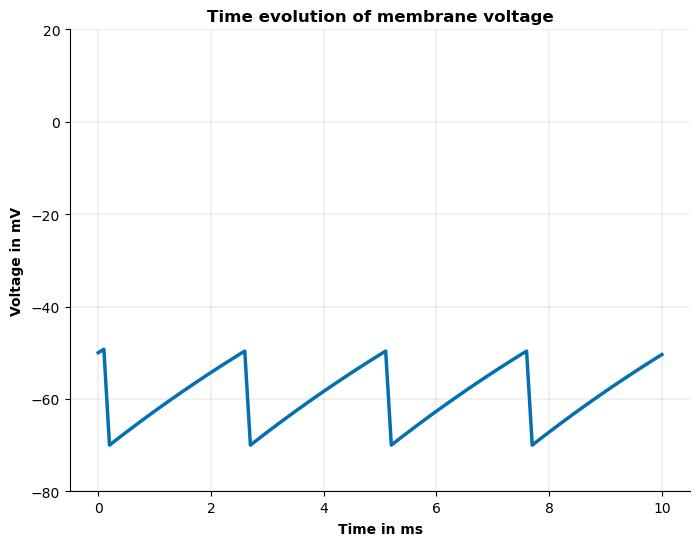

In [6]:
neuron = LIFNeuron()
neuron.run_simulation(100)
neuron.plot_traces()

#### Task 15 - Explain the plot below
Even more, we can now use this class in a very flexible way, since we can also access and change the parameters in an instance, once it is created. Can you describe what happens in the next cell? 

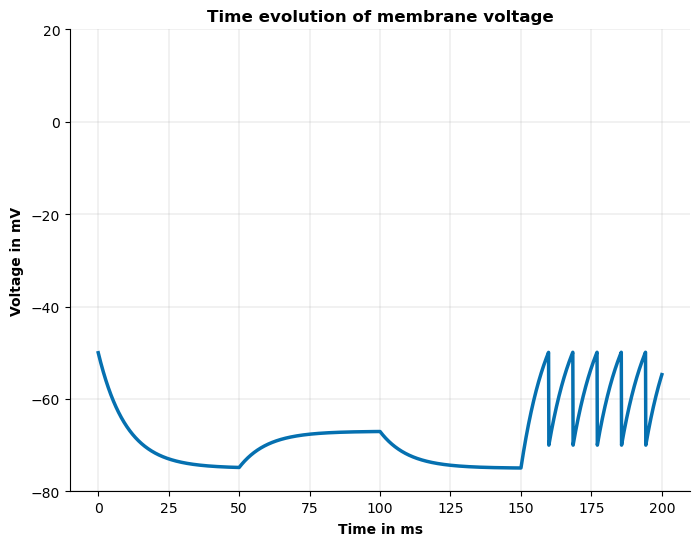

In [7]:
neuron = LIFNeuron(I_e = 0)
neuron.run_simulation(500)
neuron.I_e = 8e-9
neuron.run_simulation(500)
neuron.I_e = 0
neuron.run_simulation(500)
neuron.I_e = 4e-8
neuron.run_simulation(500)
neuron.plot_traces()

[Solution 15 - what happend](https://raw.githubusercontent.com/comp-neural-circuits/intro-to-comp-neuro/dev/notebooks/Exc_1/solutions/08adc119b92a93040de437337a924b92.txt)

#### Task 16 - Bonus

In case you have some time left, here are some ideas on how to modify the code of our LIF class to make it 'more realistic'

1) There are no real spikes at the moment. We immediately set the voltage value back to the reset potential. Can you change the code so that we see a more realistic spike? When the voltage crosses the threshold, it should usually reach membrane potentials around -20 mV

2) Usually neurons have a so called 'refractory period'. This means that they cannot spike for some time after they spiked once. Our neuron model does not have that, can you add a refractory period by holding the membrane potential at rest for 10 ms after each spike?

# Congratulations

This was the first notebook of this semester about the LIF model. 